<font color="#CC3D3D"><p>
# Cross-Validation

In [1]:
# 사이킷런에서 제공하는 손으로 쓴 숫자(0~9) 이미지 데이터 세트 (8x8 픽셀)
from sklearn.datasets import load_digits

digits = load_digits()

# 'data', 'target', 'target_names', 'images', 'DESCR' 필드로 구성
digits.keys()

# digits.data는 이미지 속성을, digits.target는 클래스 레이블(0~9)을 갖고 있음

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
digits.data.shape

(1797, 64)

In [3]:
digits.data[50]

array([ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
       14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
        0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
        0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
       11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.])

4

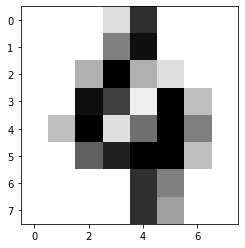

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# digits.data는 1차원 데이터이기 때문에 이미지를 도식하려면 2차원으로 변경해야 함
plt.imshow(digits.data[100].reshape(8,8), cmap=plt.cm.gray_r)
digits.target[100]

In [5]:
X, y = digits.data, digits.target

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model = DecisionTreeClassifier()
#model = LogisticRegression()
#model = KNeighborsClassifier()
#model = SVC()

In [7]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='accuracy'); scores

array([0.75833333, 0.71944444, 0.80779944, 0.83008357, 0.79665738])

In [8]:
# Change k
scores = cross_val_score(model, X, y, cv=30); scores

array([0.8       , 0.75      , 0.83333333, 0.83333333, 0.88333333,
       0.85      , 0.93333333, 0.81666667, 0.88333333, 0.83333333,
       0.91666667, 0.81666667, 0.68333333, 0.81666667, 0.86666667,
       0.85      , 0.93333333, 0.9       , 0.86666667, 0.91666667,
       0.88333333, 0.81666667, 0.91666667, 0.93333333, 0.91666667,
       0.83333333, 0.76666667, 0.76271186, 0.91525424, 0.79661017])

In [9]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.851
Std: 0.061
Min: 0.683
Max: 0.933


### LOOCV(Leave-One-Out Cross-Validation)
<img align="left" src="https://www.researchgate.net/profile/Nikolaos_Chlis/publication/266617511/figure/fig11/AS:295705362092036@1447513060277/Leave-One-Out-Cross-Validation.png" width=500 height=400 alt="Decision Tree">

In [10]:
# LOOCV is very time-consuming => useful in small data

from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores.mean()

0.8564273789649416

### Shuffle-Split Cross-Validation   
<img align="left" src="https://t1.daumcdn.net/cfile/tistory/99B45B3B5A5BE4D715" width=900 height=700 alt="Decision Tree">

In [11]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.4, n_splits=10)
scores = cross_val_score(model, X, y, cv=sscv)
scores.mean()
scores

array([0.82647386, 0.81979978, 0.80978865, 0.78976641, 0.80756396,
       0.86429366, 0.81979978, 0.81757508, 0.8298109 , 0.79866518])

<font color="#CC3D3D"><p>
# End